In [1]:
import pandas as pd

In [2]:
!ls ../data

311_SR_Data_Dictionary_2018.xlsx
NYC_311_20180101_through_20190930.csv
NYC_311_20180101_through_20190930_Sample.csv
NYC_311_20180101_through_20190930_Sample.zip
NYC_311_Data.zip


In [21]:
df = pd.read_csv("../data/NYC_311_20180101_through_20190930_Sample.csv")

/home/analytical-monk/miniconda3/envs/sci_python/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(1)

,Unique.Key,Created.Date,Closed.Date,Agency,Agency.Name,Complaint.Type,Descriptor,Location.Type,Incident.Zip,Incident.Address,...,Vehicle.Type,Taxi.Company.Borough,Taxi.Pick.Up.Location,Bridge.Highway.Name,Bridge.Highway.Direction,Road.Ramp,Bridge.Highway.Segment,Latitude,Longitude,Location
0,41002846,2018-11-21 15:40:30,2018-11-21 19:17:59,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10462,756 BRADY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.852358,-73.865283,"(40.85235761331946, -73.86528321156383)"


In [5]:
# Stats for issues filed with DOT agency 
df[df.Agency=="DOT"].groupby(['Agency'])['Unique.Key'].describe()

,count,mean,std,min,25%,50%,75%,max
Agency,,,,,,,,
DOT,76827.0,4.087503e+07,1.754869e+06,38061512.0,39258604.5,40730177.0,42400004.0,43921266.0


In [14]:
# Missing values percentages
(df.isnull().sum().sort_values()/df.shape[0])*100

Unique.Key                         0.000000
Community.Board                    0.000000
Borough                            0.000000
Open.Data.Channel.Type             0.000000
Complaint.Type                     0.000000
Park.Borough                       0.000000
Agency                             0.000000
Created.Date                       0.000000
Agency.Name                        0.000000
Status                             0.000000
Park.Facility.Name                 0.009016
Descriptor                         1.417448
Resolution.Action.Updated.Date     1.896704
Closed.Date                        3.721857
Incident.Zip                       3.996045
City                               4.746197
Latitude                           6.558327
Longitude                          6.558327
Y.Coordinate..State.Plane.         6.558327
X.Coordinate..State.Plane.         6.558327
Location                           6.558327
Resolution.Description             8.235939
Address.Type                    

## Data pre-processing

In [ ]:
# Convert datetime to native types
df['Created.Date'] = pd.to_datetime(df['Created.Date'])
df['Closed.Date'] = pd.to_datetime(df['Closed.Date'])

# Mean time for closed date
(df['Closed.Date'] - df['Created.Date']).mean()

In [22]:
# Filter datasets with close date < create dates
print((df["Created.Date"] > df["Closed.Date"]).value_counts())
df = df[df["Created.Date"] <= df["Closed.Date"]]

False    694861
True       3930
dtype: int64


## Column profiles using Optimus

Repo: https://github.com/ironmussa/Optimus  
Requires Spark

In [24]:
from optimus import Optimus
op= Optimus(verbose=True)

df = op.load.csv("../data/NYC_311_20180101_through_20190930_Sample.csv").h_repartition()

/home/analytical-monk/miniconda3/envs/sci_python/lib/python3.7/site-packages/socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable
INFO:optimus:Operative System:Linux
INFO:optimus:Just check that Spark and all necessary environments vars are present...
INFO:optimus:-----
INFO:optimus:SPARK_HOME is not set
INFO:optimus:HADOOP_HOME is not set
INFO:optimus:PYSPARK_PYTHON=/home/analytical-monk/miniconda3/envs/sci_python/bin/python
INFO:optimus:PYSPARK_DRIVER_PYTHON is not set
INFO:optimus:PYSPARK_SUBMIT_ARGS=--jars "file:///home/analytical-monk/miniconda3/envs/sci_python/lib/python3.7/site-packages/optimus/jars/RedshiftJDBC42-1.2.16.1027.jar,file:///home/analytical-monk/miniconda3/envs/sci_python/lib/python3.7/site-packages/optimus/jars/mysql-connector-java-8.0.16.jar,file:///home/analytical-monk/miniconda3/envs/sci_python/lib/python3.7/site-packages

INFO:optimus:Processing Stats For columns...
INFO:optimus:Batch Stats 0. Processing columns['Agency']
INFO:optimus:Batch Histogram 0. Processing columns['Agency']
INFO:optimus:Processing Frequency ...
INFO:optimus:`Created_Date`,`Closed_Date`,`Agency`,`Agency_Name`,`Complaint_Type`,`Descriptor`,`Location_Type`,`Incident_Zip`,`Incident_Address`,`Street_Name`,`Cross_Street_1`,`Cross_Street_2`,`Intersection_Street_1`,`Intersection_Street_2`,`Address_Type`,`City`,`Landmark`,`Facility_Type`,`Status`,`Due_Date`,`Resolution_Description`,`Resolution_Action_Updated_Date`,`Community_Board`,`Borough`,`Open_Data_Channel_Type`,`Park_Facility_Name`,`Park_Borough`,`Vehicle_Type`,`Taxi_Company_Borough`,`Taxi_Pick_Up_Location`,`Bridge_Highway_Name`,`Bridge_Highway_Direction`,`Road_Ramp`,`Bridge_Highway_Segment`,`Location` column(s) was not processed because is/are not byte,short,big,int,double,float
INFO:optimus:`Created_Date`,`Closed_Date`,`Agency`,`Agency_Name`,`Complaint_Type`,`Descriptor`,`Location

Number of columns,41
Number of rows,698791
Total Missing (%),0
Total size in memory,-1 Bytes
Categorical,0
Numeric,0
Date,0
Array,0
Not available,0
Unique,28
Unique (%),0.0

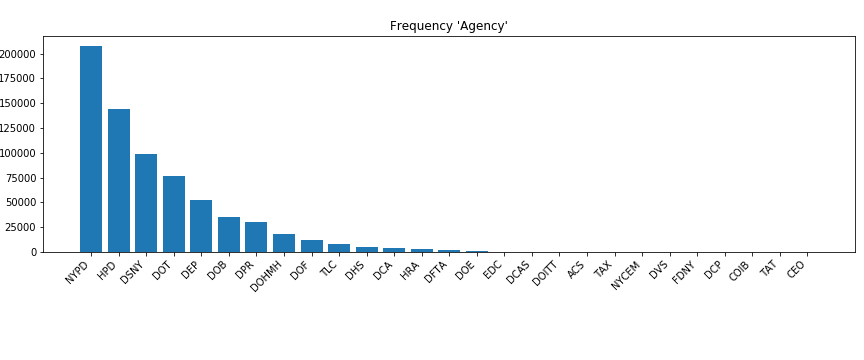

INFO:optimus:run() executed in 107.05 sec


In [25]:
op.profiler.run(df, "Agency", infer=False, approx_count=True)

INFO:optimus:Processing Stats For columns...
INFO:optimus:Batch Stats 0. Processing columns['Landmark']
INFO:optimus:Batch Histogram 0. Processing columns['Landmark']
INFO:optimus:Processing Frequency ...
INFO:optimus:`Created_Date`,`Closed_Date`,`Agency`,`Agency_Name`,`Complaint_Type`,`Descriptor`,`Location_Type`,`Incident_Zip`,`Incident_Address`,`Street_Name`,`Cross_Street_1`,`Cross_Street_2`,`Intersection_Street_1`,`Intersection_Street_2`,`Address_Type`,`City`,`Landmark`,`Facility_Type`,`Status`,`Due_Date`,`Resolution_Description`,`Resolution_Action_Updated_Date`,`Community_Board`,`Borough`,`Open_Data_Channel_Type`,`Park_Facility_Name`,`Park_Borough`,`Vehicle_Type`,`Taxi_Company_Borough`,`Taxi_Pick_Up_Location`,`Bridge_Highway_Name`,`Bridge_Highway_Direction`,`Road_Ramp`,`Bridge_Highway_Segment`,`Location` column(s) was not processed because is/are not byte,short,big,int,double,float
INFO:optimus:`Created_Date`,`Closed_Date`,`Agency`,`Agency_Name`,`Complaint_Type`,`Descriptor`,`Loca

Number of columns,41
Number of rows,698791
Total Missing (%),652152
Total size in memory,-1 Bytes
Categorical,0
Numeric,0
Date,0
Array,0
Not available,1
Unique,4656
Unique (%),0.67

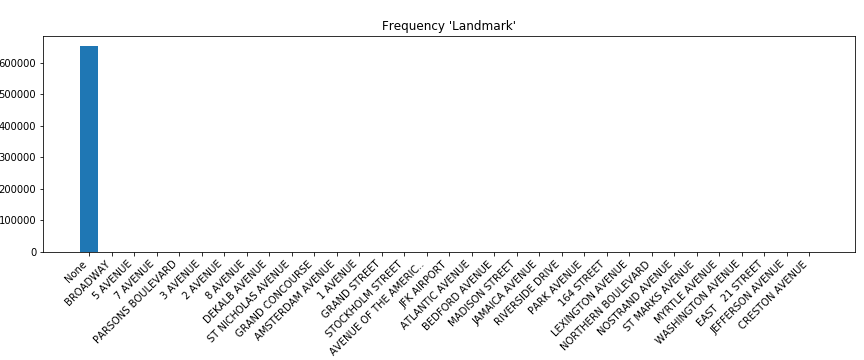

INFO:optimus:run() executed in 90.06 sec


In [26]:
op.profiler.run(df, "Landmark", infer=False, approx_count=True)

In [ ]:
op.profiler.run(df, "Created_Date", infer=True)

### That's all folks!